In [1]:
from google.colab import files
uploaded = files.upload()


Saving Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv to Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv
Saving Metro_zori_uc_sfr_sm_month.csv to Metro_zori_uc_sfr_sm_month.csv


In [2]:
import pandas as pd

# Load the datasets
housing_df = pd.read_csv('Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
rent_df = pd.read_csv('Metro_zori_uc_sfr_sm_month.csv')

# Display the first few rows of each dataset
print("Housing Data:")
print(housing_df.head())

print("\nRent Data:")
print(rent_df.head())


Housing Data:
   RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
0    102001         0    United States    country       NaN  121531.336651   
1    394913         1     New York, NY        msa        NY  215526.347853   
2    753899         2  Los Angeles, CA        msa        CA  228840.318549   
3    394463         3      Chicago, IL        msa        IL  156308.333980   
4    394514         4       Dallas, TX        msa        TX  126045.193158   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  121738.651072  121995.876446  122548.308184  123184.186238  ...   
1  216437.299774  217353.388393  219206.206623  221115.123983  ...   
2  229713.653329  230850.552728  233116.339880  235575.321729  ...   
3  156460.092041  156739.556227  157434.724023  158265.478146  ...   
4  126100.940737  126169.731762  126344.177104  126568.833701  ...   

      2024-01-31     2024-02-29     2024-03-31     2024-04-30     2024-05-31  \
0  350593.674816

In [3]:
# Choose the date for analysis
date_column = '2024-10-31'

# Filter housing data
housing_filtered = housing_df[['RegionName', 'StateName', date_column]].rename(columns={date_column: 'HousingPrice'})

# Filter rent data
rent_filtered = rent_df[['RegionName', 'StateName', date_column]].rename(columns={date_column: 'RentPrice'})

# Display filtered datasets
print("Filtered Housing Data:")
print(housing_filtered.head())

print("\nFiltered Rent Data:")
print(rent_filtered.head())


Filtered Housing Data:
        RegionName StateName   HousingPrice
0    United States       NaN  358695.400157
1     New York, NY        NY  691747.775297
2  Los Angeles, CA        CA  994897.480686
3      Chicago, IL        IL  338506.114351
4       Dallas, TX        TX  371494.296639

Filtered Rent Data:
        RegionName StateName    RentPrice
0    United States       NaN  2214.826710
1     New York, NY        NY  3509.750205
2  Los Angeles, CA        CA  4279.602359
3      Chicago, IL        IL  2366.401698
4       Dallas, TX        TX  2328.929081


In [4]:
# Merge the filtered datasets on RegionName and StateName
merged_df = pd.merge(housing_filtered, rent_filtered, on=['RegionName', 'StateName'])

# Display the merged dataset
print("Merged Data:")
print(merged_df.head())


Merged Data:
        RegionName StateName   HousingPrice    RentPrice
0    United States       NaN  358695.400157  2214.826710
1     New York, NY        NY  691747.775297  3509.750205
2  Los Angeles, CA        CA  994897.480686  4279.602359
3      Chicago, IL        IL  338506.114351  2366.401698
4       Dallas, TX        TX  371494.296639  2328.929081


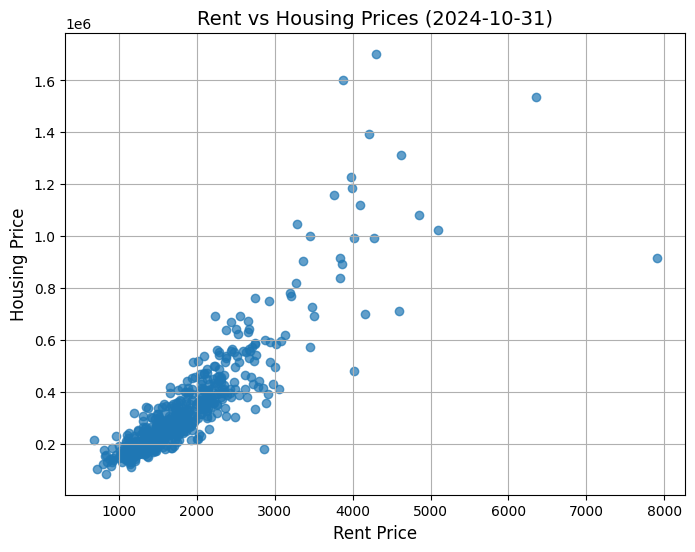

In [5]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['RentPrice'], merged_df['HousingPrice'], alpha=0.7)
plt.title('Rent vs Housing Prices (2024-10-31)', fontsize=14)
plt.xlabel('Rent Price', fontsize=12)
plt.ylabel('Housing Price', fontsize=12)
plt.grid(True)
plt.show()


In [6]:
# Calculate rent-to-housing price ratio
merged_df['RentToPriceRatio'] = merged_df['RentPrice'] / merged_df['HousingPrice']

# Display regions with highest and lowest ratios
print("Top 5 Regions with Highest Rent-to-Price Ratios:")
print(merged_df[['RegionName', 'StateName', 'RentToPriceRatio']].sort_values(by='RentToPriceRatio', ascending=False).head())

print("\nTop 5 Regions with Lowest Rent-to-Price Ratios:")
print(merged_df[['RegionName', 'StateName', 'RentToPriceRatio']].sort_values(by='RentToPriceRatio', ascending=True).head())


Top 5 Regions with Highest Rent-to-Price Ratios:
         RegionName StateName  RentToPriceRatio
191  Binghamton, NY        NY          0.015715
352     Decatur, IL        IL          0.010426
409    Danville, IL        IL          0.009805
365    Meridian, MS        MS          0.009346
385  Orangeburg, SC        SC          0.009284

Top 5 Regions with Lowest Rent-to-Price Ratios:
             RegionName StateName  RentToPriceRatio
502         Jackson, WY        WY          0.002421
35         San Jose, CA        CA          0.002522
506    Breckenridge, CO        CO          0.003023
499         Lebanon, MO        MO          0.003109
54   Urban Honolulu, HI        HI          0.003137


In [7]:
# Save the dataset
merged_df.to_csv('Rent_Housing_Analysis.csv', index=False)

# Download the file
from google.colab import files
files.download('Rent_Housing_Analysis.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Filter relevant columns (RegionName, StateName, and all date columns)
housing_time_series = housing_df.set_index(['RegionName', 'StateName']).iloc[:, 5:]
rent_time_series = rent_df.set_index(['RegionName', 'StateName']).iloc[:, 5:]

# Align datasets to have the same dates
common_dates = housing_time_series.columns.intersection(rent_time_series.columns)
housing_time_series = housing_time_series[common_dates]
rent_time_series = rent_time_series[common_dates]

# Calculate rent-to-price ratio for each date
affordability_trends = rent_time_series / housing_time_series
affordability_trends.columns = [pd.to_datetime(col).strftime('%Y-%m') for col in affordability_trends.columns]

# Reset the index for analysis
affordability_trends.reset_index(inplace=True)
print(affordability_trends.head())


     RegionName StateName   2015-03   2015-04   2015-05   2015-06   2015-07  \
0  Aberdeen, SD        SD       NaN       NaN       NaN       NaN       NaN   
1  Aberdeen, WA        WA       NaN       NaN       NaN       NaN       NaN   
2   Abilene, TX        TX  0.007656  0.007649  0.007728  0.007771  0.007764   
3       Ada, OK        OK       NaN       NaN       NaN       NaN       NaN   
4    Adrian, MI        MI       NaN       NaN       NaN       NaN       NaN   

    2015-08  2015-09   2015-10  ...   2024-01   2024-02  2024-03   2024-04  \
0       NaN      NaN       NaN  ...       NaN       NaN      NaN       NaN   
1       NaN      NaN       NaN  ...       NaN       NaN      NaN  0.005337   
2  0.007645  0.00755  0.007444  ...  0.007108  0.007089  0.00715  0.007252   
3       NaN      NaN       NaN  ...       NaN       NaN      NaN       NaN   
4       NaN      NaN       NaN  ...       NaN       NaN      NaN       NaN   

    2024-05   2024-06   2024-07   2024-08   2024-09   20

In [9]:
# Calculate the average affordability ratio for each time period
avg_affordability_trend = affordability_trends.drop(columns=['RegionName', 'StateName']).mean(axis=0)

# Convert to a DataFrame for plotting
avg_affordability_trend = avg_affordability_trend.reset_index()
avg_affordability_trend.columns = ['Date', 'AvgRentToPriceRatio']

# Ensure the dates are sorted correctly
avg_affordability_trend['Date'] = pd.to_datetime(avg_affordability_trend['Date'])
avg_affordability_trend.sort_values(by='Date', inplace=True)

# Preview the results
print(avg_affordability_trend.head())


        Date  AvgRentToPriceRatio
0 2015-03-01             0.006376
1 2015-04-01             0.006390
2 2015-05-01             0.006410
3 2015-06-01             0.006414
4 2015-07-01             0.006406


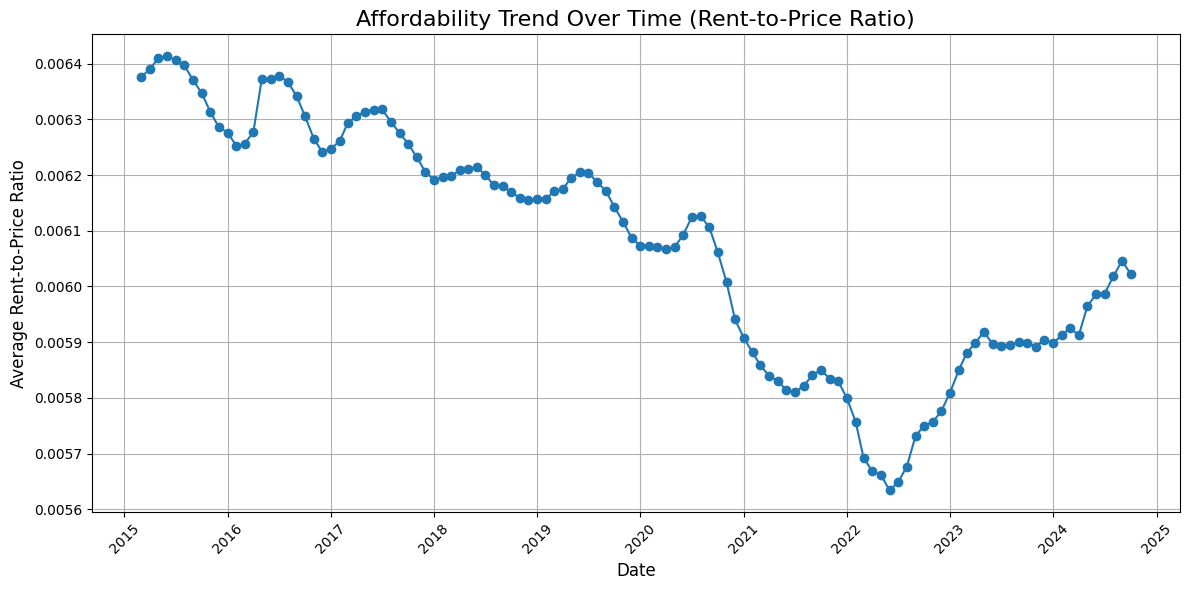

In [10]:
import matplotlib.pyplot as plt

# Plot the affordability trend
plt.figure(figsize=(12, 6))
plt.plot(avg_affordability_trend['Date'], avg_affordability_trend['AvgRentToPriceRatio'], marker='o', linestyle='-')
plt.title('Affordability Trend Over Time (Rent-to-Price Ratio)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Rent-to-Price Ratio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
affordability_trends.to_csv('Affordability_Trends.csv', index=False)
from google.colab import files
files.download('Affordability_Trends.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>